In [1]:
# part 1:
# add salt and paper noise to image then reduce noise using median method

# part 2:
# # Face align with eyes

In [2]:
from random import choices
import math
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image

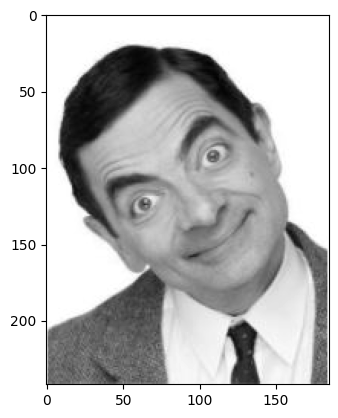

In [3]:
# part1: add salt and paper noise to grayscale image
# Here is my own function to adding some s&p noises.
img = cv2.imread('img/mrbean.JPG', 0)
plt.imshow(img, cmap='gray')
plt.show()

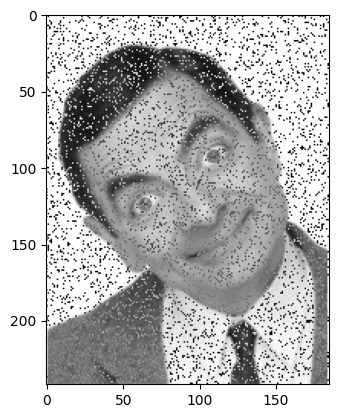

In [4]:
height, width = img.shape
for i in range(height):
    for j in range(width):
        pixel_noise = choices([True, False], cum_weights=(10, 90))[0]
        if pixel_noise==True:
            img[i, j] = 255 - img[i, j]

plt.imshow(img, cmap='gray')
plt.show()


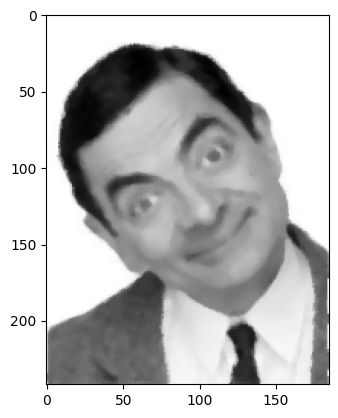

In [5]:
median_img = cv2.medianBlur(img,ksize=5)

plt.imshow(median_img, cmap='gray')
plt.show()

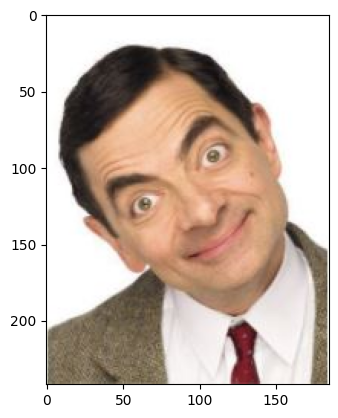

In [6]:
# part2: Face align with eyes
img = plt.imread('img/mrbean.JPG')
plt.imshow(img)
plt.show()

In [7]:
face_detector = MTCNN()

In [8]:
results = face_detector.detect_faces(img)

1/1 [==============================] - 0s 128ms/step


In [9]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [10]:
def alignment_procedure(img, left_eye, right_eye):

    #this function aligns given face in img based on left and right eye coordinates

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye


    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))


    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

    
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))



    return img #return img anyway

In [11]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)

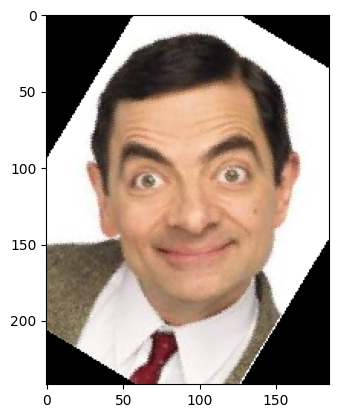

In [12]:
plt.imshow(img)